In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from zipfile import ZipFile

with ZipFile('archive.zip', 'r') as obj:
    obj.extractall()

In [3]:
df = pd.read_csv('loan/loan.csv')
df.head()

/tmp/ipykernel_13051/2035651734.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(887379, 74)

### Goal
Predict loan status

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

#### Dropping 
-  open_acc_6m                  21372 non-null   float64
-  open_il_6m                   21372 non-null   float64
-  open_il_12m                  21372 non-null   float64
-  open_il_24m                  21372 non-null   float64
-  mths_since_rcnt_il           20810 non-null   float64
-  total_bal_il                 21372 non-null   float64
-  il_util                      18617 non-null   float64
-  open_rv_12m                  21372 non-null   float64
-  open_rv_24m                  21372 non-null   float64
-  max_bal_bc                   21372 non-null   float64
-  all_util                     21372 non-null   float64
-  total_rev_hi_lim             817103 non-null  float64
-  inq_fi                       21372 non-null   float64
-  total_cu_tl                  21372 non-null   float64
-  inq_last_12m                 21372 non-null   float64
-  annual_inc_joint             511 non-null     float64
-  dti_joint                    509 non-null     float64
-  verification_status_joint    511 non-null     object 

In [6]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

### Percent of missing data

In [7]:
miss = df.isnull().sum()*100/len(df)

In [8]:
miss.sort_values(ascending=False).head(21)

dti_joint                      99.942640
annual_inc_joint               99.942415
verification_status_joint      99.942415
il_util                        97.902024
mths_since_rcnt_il             97.654892
open_acc_6m                    97.591559
open_il_6m                     97.591559
open_il_12m                    97.591559
open_il_24m                    97.591559
total_bal_il                   97.591559
inq_last_12m                   97.591559
open_rv_12m                    97.591559
open_rv_24m                    97.591559
max_bal_bc                     97.591559
all_util                       97.591559
inq_fi                         97.591559
total_cu_tl                    97.591559
desc                           85.797951
mths_since_last_record         84.555303
mths_since_last_major_derog    75.015974
mths_since_last_delinq         51.197065
dtype: float64

<Axes: xlabel='count', ylabel='loan_status'>

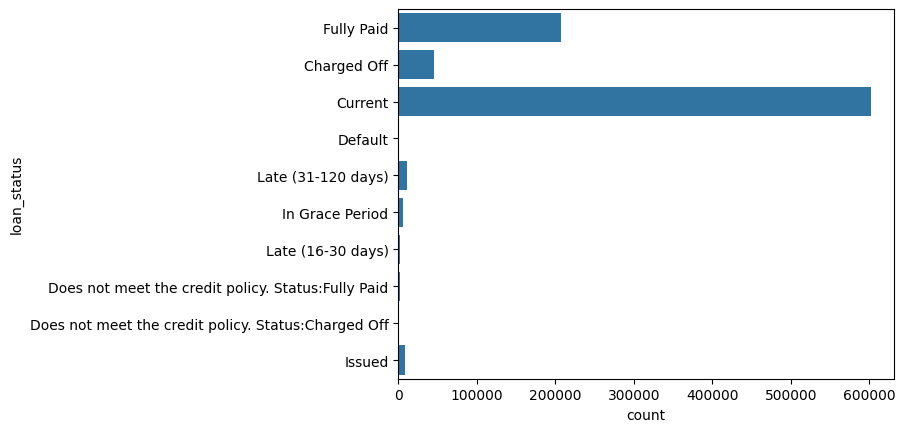

In [9]:
sns.countplot(df['loan_status'])

In [10]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [11]:
def risky(loan_status):
    risk_group = [ 'Charged Off', 'Default','Late (31-120 days)', 
             'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Charged Off']
    
    not_risk_group = ['Does not meet the credit policy. Status:Fully Paid', 'Current', 'Fully Paid' ]
    if loan_status in risk_group:
        return 1
    elif loan_status in not_risk_group:
        return 0

df.loan_status = df.loan_status.apply(risky)

In [12]:
df.loan_status.value_counts()

loan_status
0.0    811490
1.0     67429
Name: count, dtype: int64

In [13]:
missing_lot = ['dti_joint', 'annual_inc_joint', 'verification_status_joint', 'il_util',
       'mths_since_rcnt_il', 'total_bal_il', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'inq_last_12m', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'desc', 'mths_since_last_record', 'mths_since_last_major_derog',
       'mths_since_last_delinq', 'loan_status']
df_new = df[missing_lot].copy()

In [14]:
# sns.pairplot(df_new, hue='loan_status')

In [15]:
df.mths_since_last_major_derog

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
887374     NaN
887375    29.0
887376     NaN
887377    22.0
887378     NaN
Name: mths_since_last_major_derog, Length: 887379, dtype: float64

In [16]:
# sns.barplot(x='loan_status', y='mths_since_last_major_derog')

In [17]:

# fig, axes = plt.subplots(7,3)

# for i in range(len(missing_lot) - 1):

#     sns.boxplot(x = 'loan_status', y='mths_since_last_major_derog', data=df, ax=axes[0])

#     sns.boxplot(x = 'loan_status', y='total_bal_il', data=df, ax=axes[1])

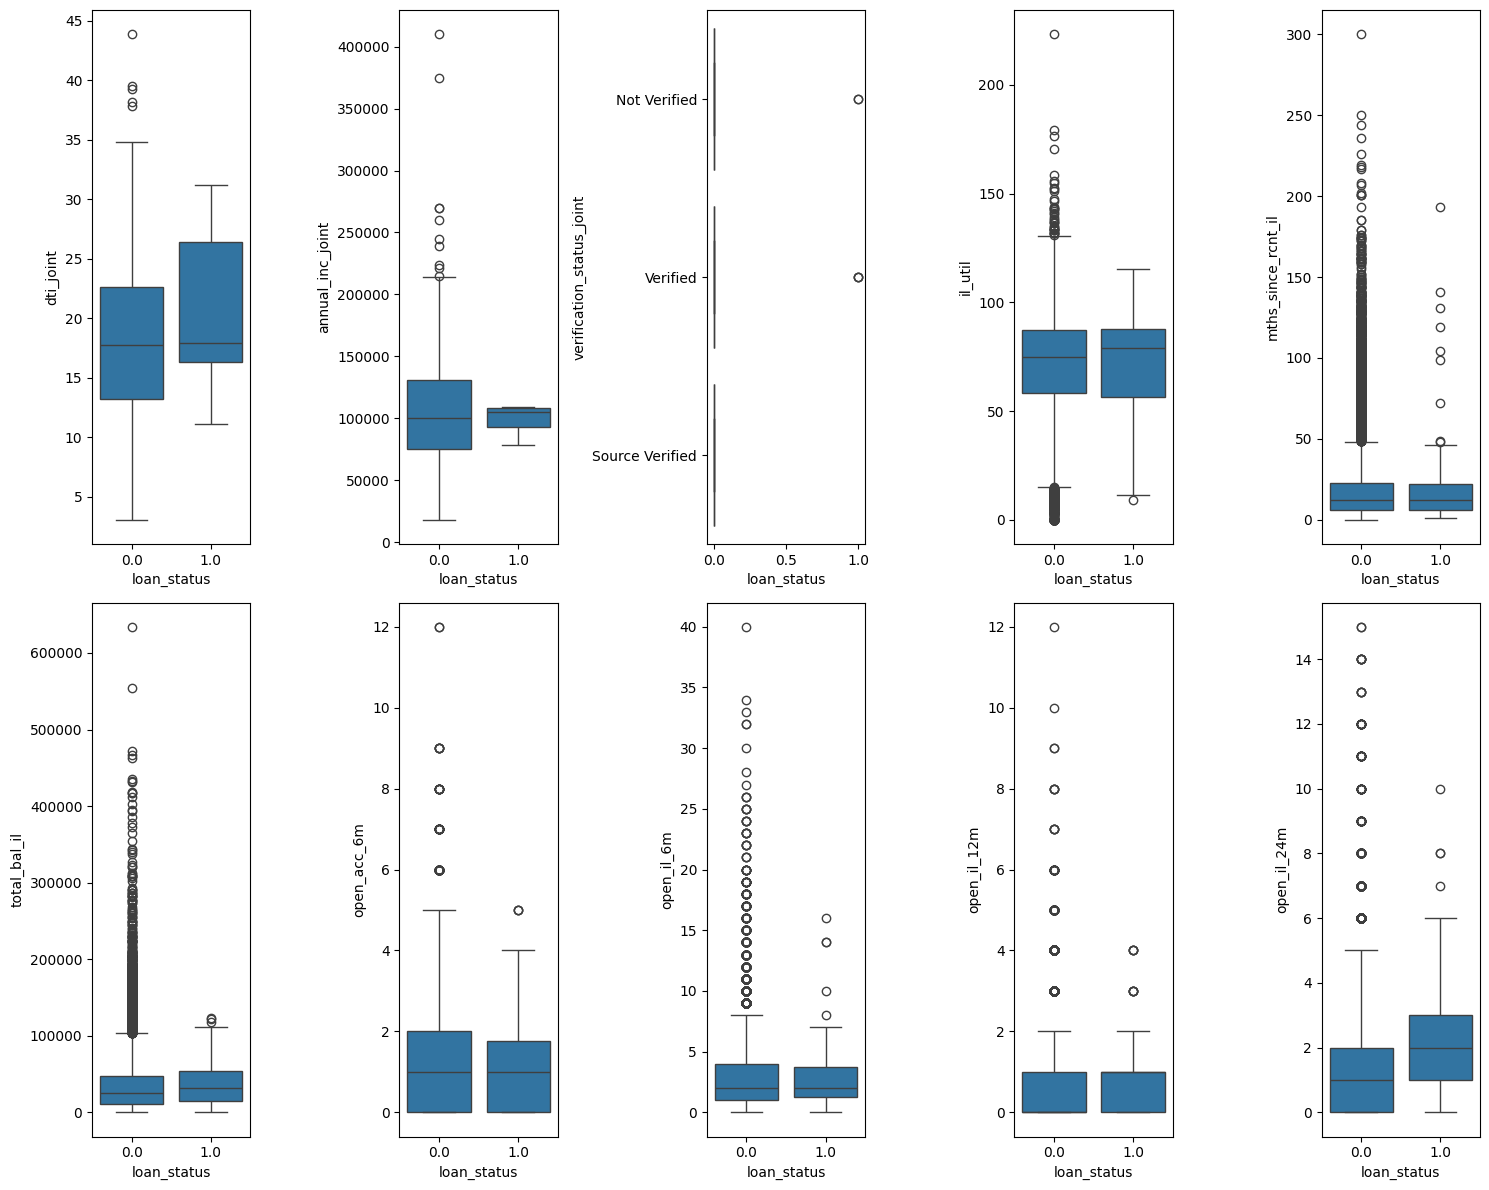

In [18]:
# nums = [i for i in range(21)]
# missing_lot_no = list(zip(missing_lot[:-1], nums))
nums = [i for i in range(10)]
missing_lot_no = list(zip(missing_lot[:-1], nums))

fig, axes = plt.subplots(2, 5, figsize=(15,12))
axes = axes.ravel()
for att, i in missing_lot_no:
        # print(att)
        ax = axes[i]
        sns.boxplot(x='loan_status', y=att, data=df, ax=ax)
       
plt.tight_layout()
plt.show()

In [19]:
nums = [i for i in range(11)]
missing_lot_no = list(zip(missing_lot[10:-1], nums))
print(missing_lot_no)

[('inq_last_12m', 0), ('open_rv_12m', 1), ('open_rv_24m', 2), ('max_bal_bc', 3), ('all_util', 4), ('inq_fi', 5), ('total_cu_tl', 6), ('desc', 7), ('mths_since_last_record', 8), ('mths_since_last_major_derog', 9), ('mths_since_last_delinq', 10)]


In [20]:
nums = [i for i in range(10)]
missing_lot_no = list(zip(missing_lot[11:-1], nums))

fig, axes = plt.subplots(2, 5, figsize=(15,12))
axes = axes.ravel()
for att, i in missing_lot_no:
        # print(att)
        ax = axes[i]
        sns.boxplot(x='loan_status', y=att, data=df, ax=ax)
       
plt.tight_layout()
plt.show()

In [ ]:
# fig, axes = plt.subplots(7,3, figsize=(15,15))
# axes